# using python to adjust stls...
01/09/23

In [30]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import math
import os



In [20]:
def plot_mesh(mesh):
    # Create a new plot
    figure = pyplot.figure()
    axes = figure.add_subplot(projection='3d')


    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(mesh.vectors, alpha=0.4))

    axes.set_xlabel("x")
    axes.set_ylabel("y")
    axes.set_zlabel("z")

    # Auto scale to the mesh size
    scale = m1.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)

    # Show the plot to the screen
    pyplot.show()

In [39]:
LOCATION_PATH = "../hr12_fullScale/constant/triSurface/"
STL_PATH = os.path.join(LOCATION_PATH, "box.stl")

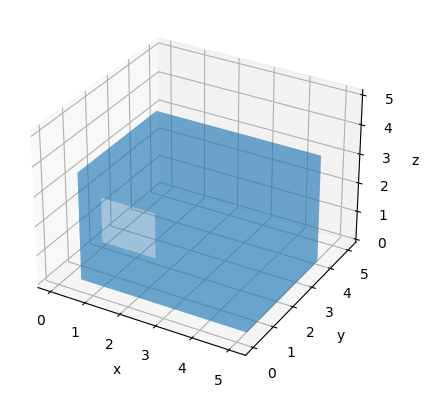

In [40]:
# Load the STL files and add the vectors to the plot
m1 = mesh.Mesh.from_file(STL_PATH)
plot_mesh(m1)

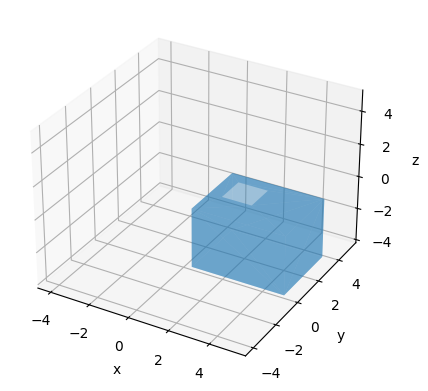

In [41]:
m1.rotate([1, 0, 0], math.radians(90))
plot_mesh(m1)


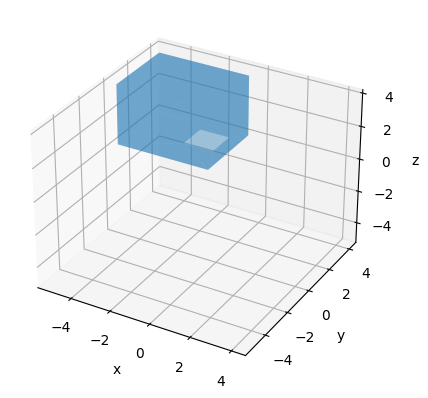

In [42]:
m1.rotate([0, 1, 0], math.radians(180))
plot_mesh(m1)

In [43]:
SAVE_PATH = os.path.join(LOCATION_PATH, "box2.stl")
m1.save(SAVE_PATH)